<a href="https://colab.research.google.com/github/femi620/Parkinson_disease_Analysis/blob/main/Parkinson_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

IMPORTING LIBRARIES

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

IMPORTING DATA

In [7]:
from google.colab import files
upload = files.upload()

Saving parkinsons_disease_data.csv to parkinsons_disease_data (1).csv


In [8]:
df = pd.read_csv("parkinsons_disease_data.csv")

In [9]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [10]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,0,DrXXXConfid
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,1,DrXXXConfid
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,1,DrXXXConfid
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,1,DrXXXConfid


DATA EXPLORATION & PREPROCESSING

In [11]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,...,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,4110.000000,69.601900,0.492637,0.692637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,...,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,607.805479,11.594511,0.500065,1.003827,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,...,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,3058.000000,50.000000,0.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,...,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3584.000000,60.000000,0.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,...,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4110.000000,70.000000,0.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,...,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4636.000000,80.000000,1.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,...,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,5162.000000,89.000000,1.000000,3.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,...,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

PatientID                   0
Age                         0
Gender                      0
Ethnicity                   0
EducationLevel              0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
FunctionalAssessment        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis 

In [15]:
df["Diagnosis"].unique()

array([0, 1])

In [16]:
df["Diagnosis"].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='count'>

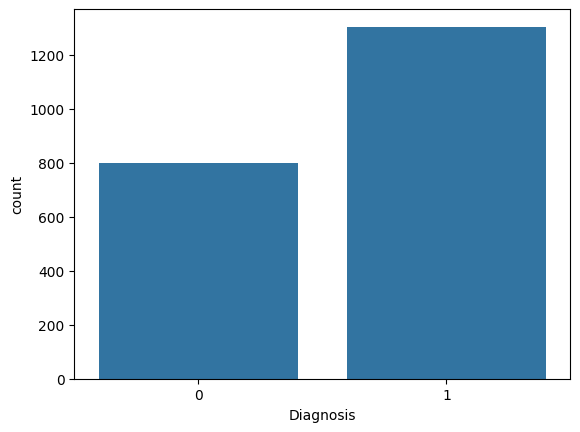

In [23]:
sns.countplot(x = "Diagnosis", data = df)

In [24]:
df = df.drop(['DoctorInCharge'], axis = 1)


KeyError: "['DoctorInCharge'] not found in axis"

In [31]:
s = df["Diagnosis"]
df = df.drop("Diagnosis", axis = 1)
df["Diagnosis"] = s

df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,DoctorInCharge,Diagnosis
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,DrXXXConfid,0
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,DrXXXConfid,1
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,DrXXXConfid,1
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,DrXXXConfid,1
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,DrXXXConfid,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,5158,87,1,0,2,38.483841,0,12.674393,5.325900,5.947278,...,8.076254,1,0,0,0,1,1,0,DrXXXConfid,0
2101,5159,67,0,0,1,33.694396,1,0.977018,0.108599,4.825187,...,1.665751,0,0,0,1,0,1,1,DrXXXConfid,1
2102,5160,65,0,0,2,22.829631,0,6.152286,5.775103,0.334244,...,4.785614,0,0,0,0,1,1,0,DrXXXConfid,1
2103,5161,61,1,0,0,16.871030,1,0.292094,2.280475,9.598513,...,8.378979,1,0,1,0,0,1,1,DrXXXConfid,1


<Axes: >

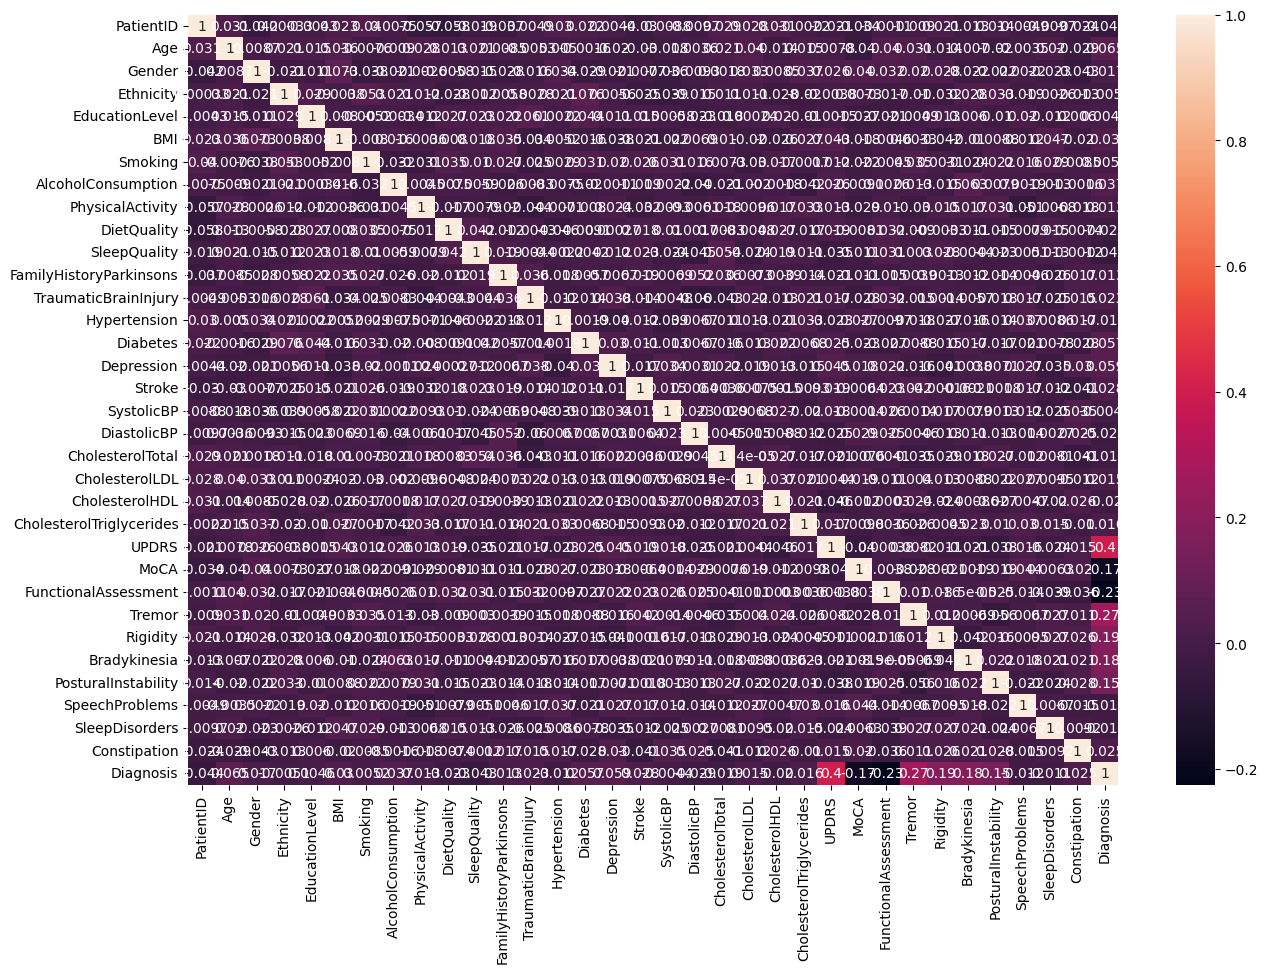

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

DATA SPLITTING (1)

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

FEATURE SELECTION

Selected Features:
['UPDRS', 'FunctionalAssessment', 'PosturalInstability', 'Tremor', 'Rigidity', 'MoCA', 'TraumaticBrainInjury', 'Stroke', 'Bradykinesia', 'Gender', 'FamilyHistoryParkinsons', 'SystolicBP', 'Age', 'Hypertension', 'EducationLevel']


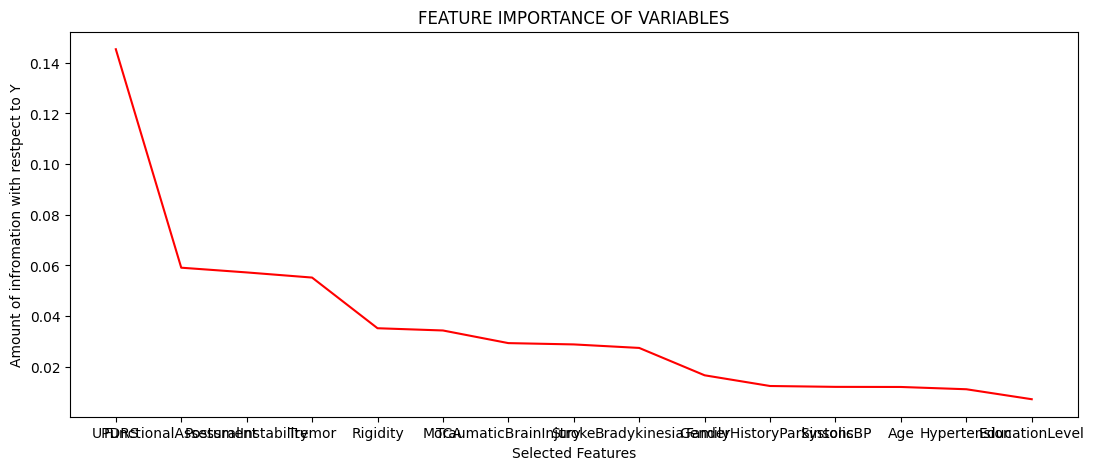

In [29]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,f_regression
import numpy as np
import matplotlib.pyplot as plt
k = 15
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
#plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

Selected Features:
['UPDRS', 'FunctionalAssessment', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'MoCA', 'Tremor', 'FamilyHistoryParkinsons', 'DiastolicBP', 'Stroke', 'Constipation', 'Diabetes', 'Age', 'PatientID', 'TraumaticBrainInjury']


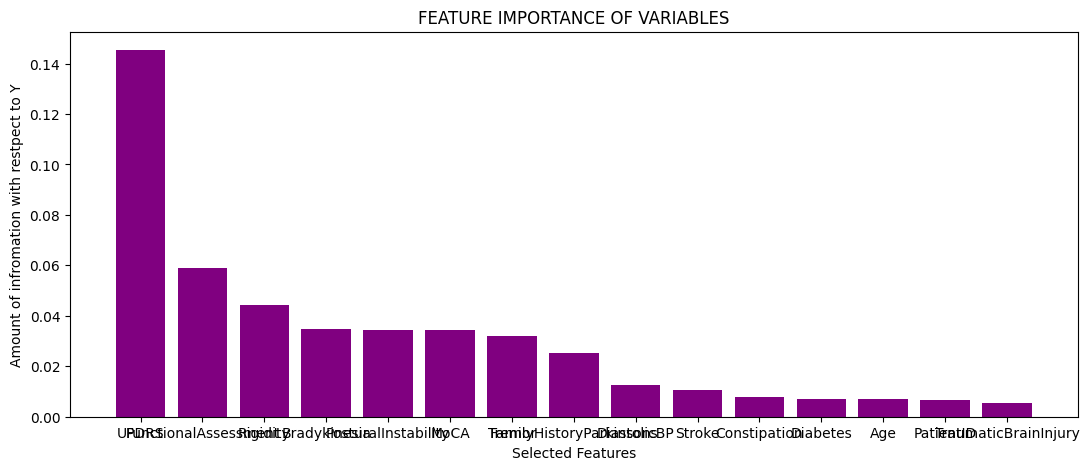

In [30]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,f_regression
import numpy as np
import matplotlib.pyplot as plt
k = 15
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
#plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

FEATURE SCALING (Standardization using StandardScaler)

In [31]:
sc = StandardScaler()
x = sc.fit_transform(x)

CLASS BALANCING ::: Handling class imbalance i.e (oversampling or undersampling)

In [32]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)

DATA SPLITING (2) ::: Splitting for Training and Testing

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

Bagging Classifier Model

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       203
           1       0.93      0.91      0.92       189

    accuracy                           0.92       392
   macro avg       0.92      0.92      0.92       392
weighted avg       0.92      0.92      0.92       392



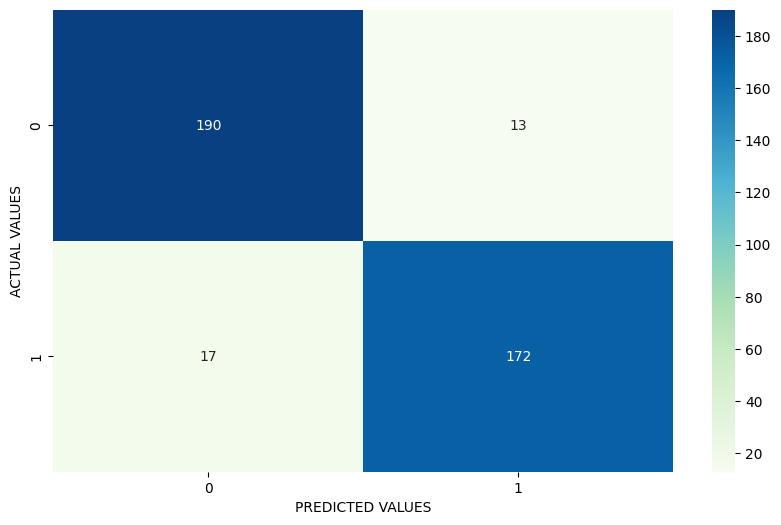

In [34]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier()
bagging_model.fit(x_train, y_train)
y_pred = bagging_model.predict(x_test)
print(classification_report(y_test,y_pred))

# Create the Confussion Matrix Heatmap
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

Random Forest Model

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       202
           1       0.94      0.94      0.94       190

    accuracy                           0.94       392
   macro avg       0.94      0.94      0.94       392
weighted avg       0.94      0.94      0.94       392



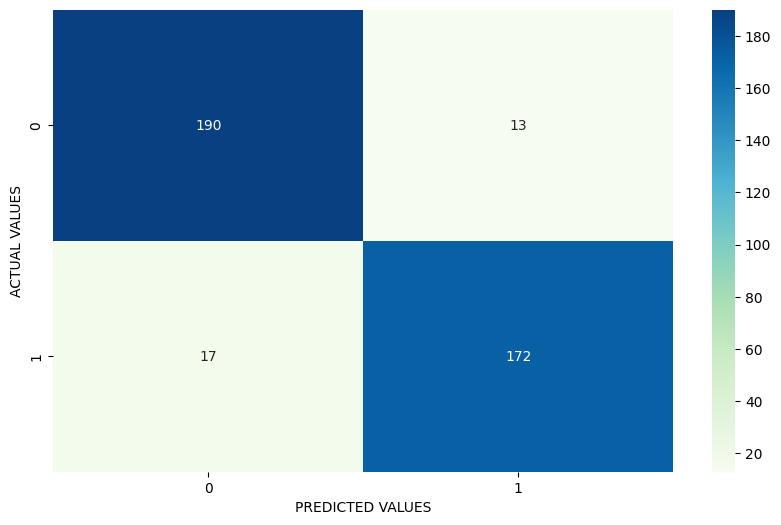

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
print(classification_report(rf_pred, y_test))

# Create the Confussion Matrix Heatmap
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
plt.show()

In [36]:
rf_pred[:50]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1])

In [37]:
y_test.values[:50]

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1])